In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sn
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!git clone https://github.com/Honf03/CS114_Data_Final.git

Cloning into 'CS114_Data_Final'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 4), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (13/13), 131.16 KiB | 5.46 MiB/s, done.


In [ ]:
train_data = pd.read_csv('/content/CS114_Data_Final/train.csv')
val_data = pd.read_csv('/content/CS114_Data_Final/val.csv')
test_data = pd.read_csv('/content/CS114_Data_Final/test.csv')

In [ ]:
train_data.head()

,Unnamed: 0.1,Unnamed: 0,No.,Comment,Label
0,259,259,260,giàu vãi cả lồn,1
1,1070,1070,1071,g,0
2,1531,1531,1532,rikaki hq buồn,0
3,1971,1971,1972,"hq thế_giới non lắm, sự_thật đi cháu, vô_địch ...",0
4,2210,2210,2211,khoa quánh veres t sợ,0


In [ ]:
train_data.drop(train_data.columns[[0, 1, 2]], axis=1, inplace=True)
val_data.drop(val_data.columns[[0, 1, 2]], axis=1, inplace=True)
test_data.drop(test_data.columns[[0, 1, 2]], axis=1, inplace=True)

In [ ]:
train_data['Comment'] = train_data['Comment'].astype(str)
val_data['Comment'] = val_data['Comment'].astype(str)
test_data['Comment'] = test_data['Comment'].astype(str)

In [ ]:
val_data.head()

,Comment,Label
0,1010 sp 12 10ad,0
1,7 mr,0
2,hở tí học_sinh cúp học net: v tuần nghỉ lí_do net,0
3,sặc,0
4,bo5 đấy hoài,0


In [ ]:
X_train = train_data['Comment']
y_train = train_data['Label']
X_val = val_data['Comment']
y_val = val_data['Label']
X_test = test_data['Comment']
y_test = test_data['Label']

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Feature extraction using TF-IDF
    ('classifier', XGBClassifier(random_state=50, n_estimators = 100))  # XGB Classifier
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [ ]:
y_pred = pipeline.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       608
           1       0.84      0.73      0.79       147
           2       0.57      0.22      0.32        54

    accuracy                           0.89       809
   macro avg       0.77      0.65      0.68       809
weighted avg       0.87      0.89      0.87       809



In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1270
           1       0.77      0.70      0.73       238
           2       0.66      0.28      0.39       111

    accuracy                           0.89      1619
   macro avg       0.78      0.65      0.69      1619
weighted avg       0.88      0.89      0.88      1619



[[1241   23    6]
 [  61  167   10]
 [  52   28   31]]
F1 - micro: 0.8888202594193947
F1 - macro: 0.6902484499944932
Accuracy: 0.8888202594193947


<Axes: >

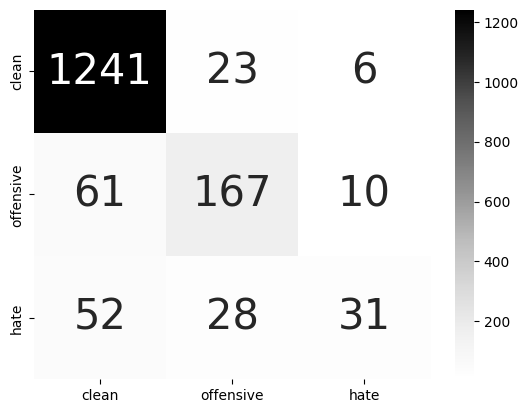

In [ ]:
cf1 = confusion_matrix(y_test, y_pred)
print(cf1)

evaluation = f1_score(y_test, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(y_test, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(evaluation))

df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})